## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


## Be sure to used Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [3]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

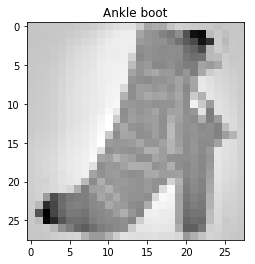

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model
![](images/simple_nn.png)

# Create the model

In [5]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.25206915 0.0344908  0.02238493 0.03746236 0.2455979  0.23861533
  0.01474024 0.03629072 0.05204329 0.06630526]] [9]


## Model Summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [7]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [8]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 84us/sample - loss: 1.7367 - accuracy: 0.4266 - val_loss: 1.2768 - val_accuracy: 0.6140
Epoch 2/10
8000/8000 [==============================] - 1s 69us/sample - loss: 1.0865 - accuracy: 0.6686 - val_loss: 0.9738 - val_accuracy: 0.6945
Epoch 3/10
8000/8000 [==============================] - 1s 64us/sample - loss: 0.8831 - accuracy: 0.7150 - val_loss: 0.8430 - val_accuracy: 0.7285
Epoch 4/10
8000/8000 [==============================] - 1s 64us/sample - loss: 0.7809 - accuracy: 0.7383 - val_loss: 0.7681 - val_accuracy: 0.7500
Epoch 5/10
8000/8000 [==============================] - 1s 68us/sample - loss: 0.7166 - accuracy: 0.7600 - val_loss: 0.7181 - val_accuracy: 0.7605
Epoch 6/10
8000/8000 [==============================] - 1s 64us/sample - loss: 0.6711 - accuracy: 0.7739 - val_loss: 0.6818 - val_accuracy: 0.7725
Epoch 7/10
8000/8000 [==============================] - 0s 59us/sample

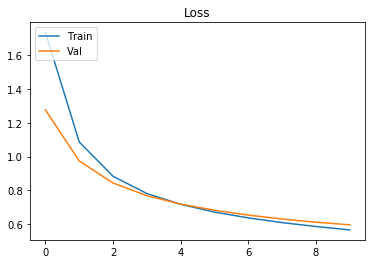

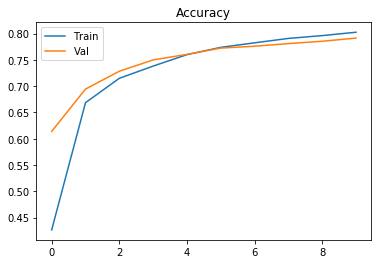

In [10]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [11]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.6163 - accuracy: 0.7856
Test Loss 0.6163142968177795
Test Accuracy 0.7856
